In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta

import warnings
warnings.filterwarnings('ignore')

In [200]:
pd.set_option('display.max_colwidth', 1000)

In [201]:
tesla_tweets_grouped=pd.read_csv('tesla_tweets_grouped.csv', index_col='Date')

In [202]:
tesla_interpolated=pd.read_csv('interpolated_tesla_df.csv',index_col='Date')

In [203]:
tesla=pd.read_csv('tesla_all_dates_prediction_residuals.csv',index_col='Date')

In [204]:
tesla_tweets_grouped=pd.read_csv('tesla_tweets_grouped.csv',index_col='Date')

In [205]:
tesla.index = pd.to_datetime(tesla.index, format='%Y-%m-%d')

In [206]:
# Defining a function to convert string to datetime and apply to date col
def str_to_datetime(x):
    return pd.to_datetime(x).date()

## Doing some EDA on the grouped DF

In [207]:
tesla_tweets_grouped.head(2)

,tweet_hashtags,tweet_counts,engagement
Date,,,
2011-12-01,I made the volume on the Model S go to 11. Now I just need to work in a miniature Stonehenge...,1,119
2011-12-22,Model S options are out! Performance in red and black for me. I will deliver my car in June/July.,1,541


## Filtering some of his most contraversial tweets about TSLA

In [208]:
filtered_df = tesla_tweets_grouped[tesla_tweets_grouped['tweet_hashtags'].str.contains('considering taking Tesla private')]
filtered_df.index=pd.to_datetime(filtered_df.index)
filtered_df

,tweet_hashtags,tweet_counts,engagement
Date,,,
2018-08-07,Investor support is confirmed. Only reason why this is not certain is that it’s contingent on a shareholder vote.| Am considering taking Tesla private at $420. Funding secured.| My hope is *all* current investors remain with Tesla even if we’re private. Would create special purpose fund enabling anyone to stay with Tesla. Already do this with Fidelity’s SpaceX investment.| Absolutely. Am super appreciative of Tesla shareholders. Will ensure their prosperity in any scenario.,4,144753


In [209]:
i=filtered_df.index
start_date=i-timedelta(days=15)
end_date=i+timedelta(days=15) 

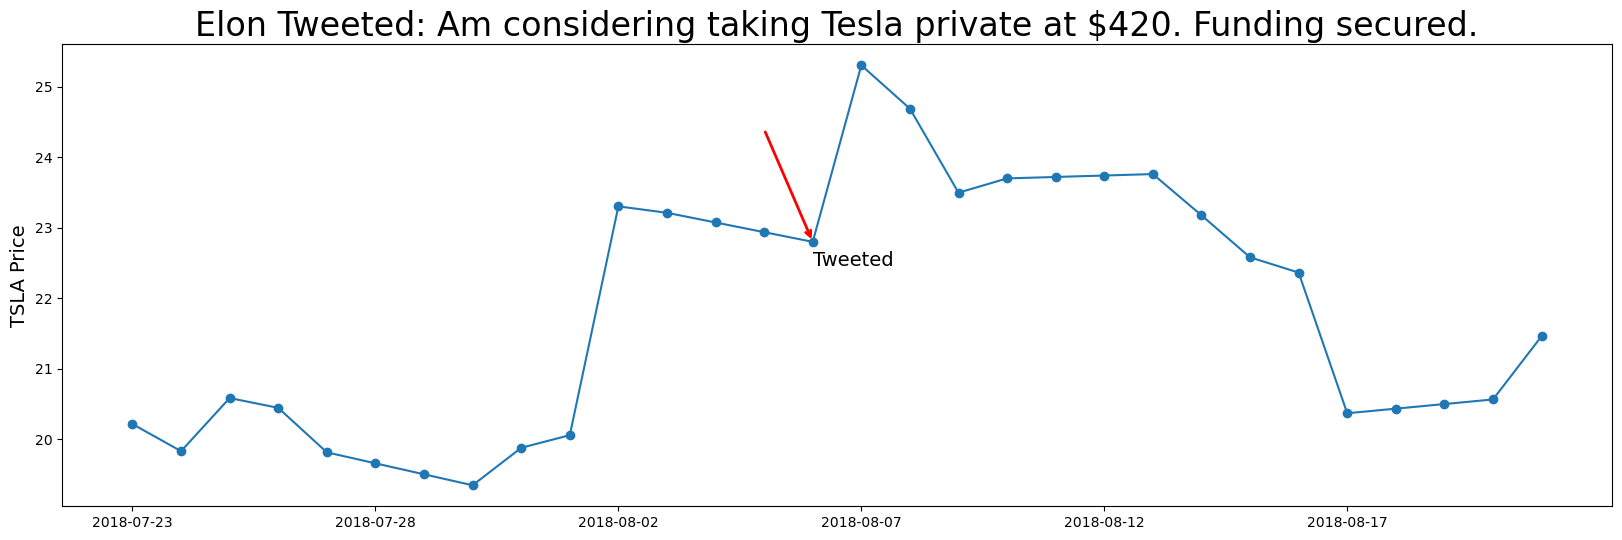

In [210]:
i=filtered_df.index
#this tweet was twitted in the morning and having huge effect on the same day.trying to show it by moving it one day back
#j=str(i)[16:26]
j=i-timedelta(days=1)
j=str(j)[16:26]

start_date=i-timedelta(days=15)
end_date=i+timedelta(days=15)
start_date=str(start_date)[16:26]
end_date=str(end_date)[16:26]

tesla_tmp=tesla_interpolated[tesla_interpolated.index>=start_date]
tesla_tmp=tesla_tmp[tesla_tmp.index<end_date]

x, y=tesla_tmp.index, tesla_tmp['Value']

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(x, y, 'o-')

#ax.set_xlabel('Date')
ax.set_ylabel('TSLA Price',fontsize=14)

j_value=tesla_tmp.loc[j,'Value']
plt.text(j, 0.985*(j_value), 'Tweeted' ,fontsize=14)

# Add an arrow pointing to the text
xytext=i-timedelta(days=2)
xytext=str(xytext)[16:26]
ax.annotate('',
            xy=(j, j_value),
            xytext=(xytext, 1.07*(j_value)),
            arrowprops=dict(arrowstyle='->', color='red', lw=2))
plt.title('Elon Tweeted: Am considering taking Tesla private at $420. Funding secured.', fontsize=24)

#X axis number of days
ax.set_xticks(x[::5])

fig.savefig('./data/tweet1.png')
plt.show()

## A tweet that caused dropping

In [211]:
filtered_df1 = tesla_tweets_grouped[tesla_tweets_grouped['tweet_hashtags'].str.contains('Tesla stock price is too high imo')]
filtered_df1.index=pd.to_datetime(filtered_df1.index)
filtered_df1

,tweet_hashtags,tweet_counts,engagement
Date,,,
2020-05-01,Tesla stock price is too high imo,1,223710


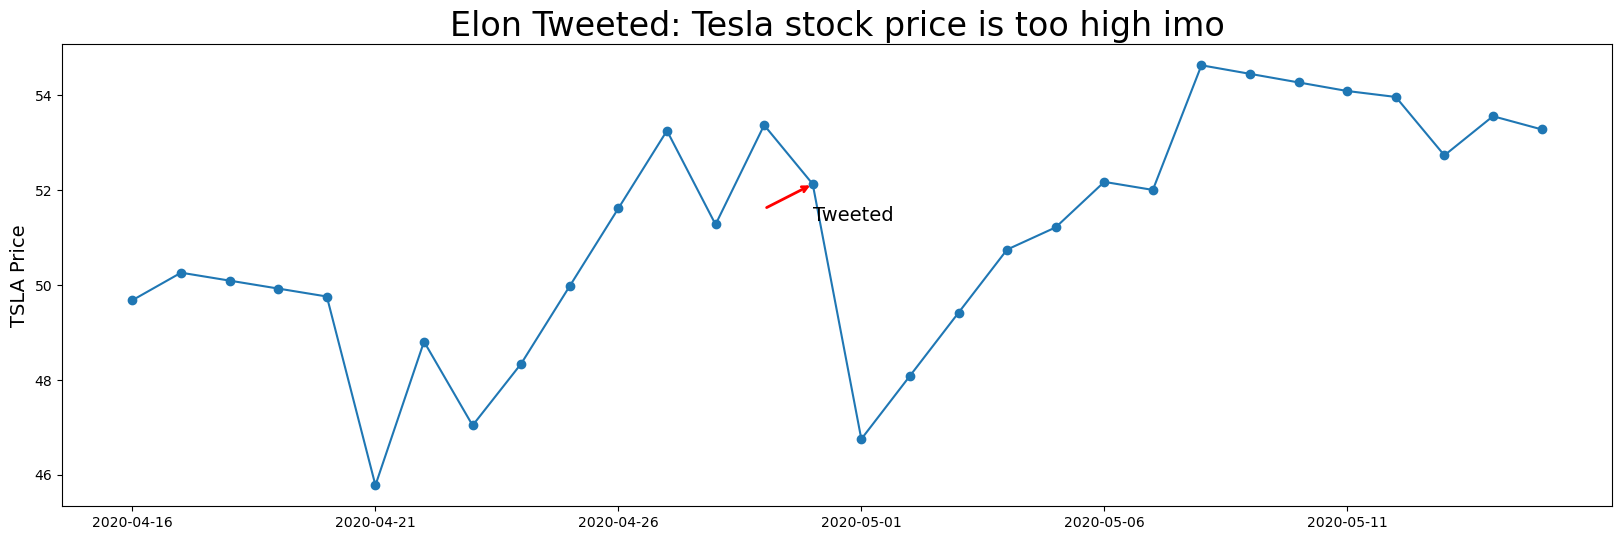

In [212]:
i1=filtered_df1.index
j1=i1-timedelta(days=1)
j1=str(j1)[16:26]

start_date1=i1-timedelta(days=15)
end_date1=i1+timedelta(days=15)
start_date1=str(start_date1)[16:26]
end_date1=str(end_date1)[16:26]

tesla_tmp1=tesla_interpolated[tesla_interpolated.index>=start_date1]
tesla_tmp1=tesla_tmp1[tesla_tmp1.index<end_date1]

x, y=tesla_tmp1.index, tesla_tmp1['Value']

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(x, y, 'o-')

#ax.set_xlabel('Date')
ax.set_ylabel('TSLA Price',fontsize=14)

j_value1=tesla_tmp1.loc[j1,'Value']
plt.text(j1, 0.985*(j_value1), 'Tweeted' ,fontsize=14)

# Add an arrow pointing to the text
xytext=i1-timedelta(days=2)
xytext=str(xytext)[16:26]
ax.annotate('',
            xy=(j1, j_value1),
            xytext=(xytext, .99*(j_value1)),
            arrowprops=dict(arrowstyle='->', color='red', lw=2))

plt.title('Elon Tweeted: Tesla stock price is too high imo', fontsize=24)

#X axis number of days
ax.set_xticks(x[::5])

fig.savefig('./data/tweet2.png')

plt.show()

## The most popular and least popular tweets

In [213]:
for i in tesla_tweets_grouped.columns:
    print (i)
    print ('Min: ',min(tesla_tweets_grouped[str(i)]))
    print ('Max: ',max(tesla_tweets_grouped[str(i)]))
    print ('--------------------------------')

tweet_hashtags
Min:  !! Will take action.| Will do. Definitely moving heavily towards direct to work/home delivery of cars!| Sorry for difficulties delivering your Tesla due to high volume! Critical to show that environmentally sustainable is financially sustainable.| Huge thank you to all Tesla supporters for helping with car deliveries all around the world. You rock!!| Tesla will deliver your car to you. This is the future. The way it should work.
Max:  💯 Tragedy| Good talking to you too. It was an honor.| Particulate matter from automotive exhausts has a much more serious impact on health than most people realize
--------------------------------
tweet_counts
Min:  1
Max:  17
--------------------------------
engagement
Min:  9
Max:  1260348
--------------------------------


In [214]:
# Most popular tweets
tesla_tweets_grouped[tesla_tweets_grouped['engagement']==max(tesla_tweets_grouped['engagement'])]

,tweet_hashtags,tweet_counts,engagement
Date,,,
2021-03-24,"You can now buy a Tesla with Bitcoin| Tesla is using only internal &amp; open source software &amp; operates Bitcoin nodes directly. Bitcoin paid to Tesla will be retained as Bitcoin, not converted to fiat currency.",2,1260348


In [215]:
# Not very popular tweets
tesla_tweets_grouped[tesla_tweets_grouped['engagement']==min(tesla_tweets_grouped['engagement'])]

,tweet_hashtags,tweet_counts,engagement
Date,,,
2013-06-25,Tesla service can do coating or can be done by any auto glass coating company. My car is done on side &amp; rear,1,9


In [216]:
# filter top 20 rows based on  best 'retweets_count'
top_20_tweets = tesla_tweets_grouped.nlargest(20, 'engagement').sort_index()

In [217]:
tesla_interpolated.head()

,Value
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-03,1.228500


In [218]:
top_20_tweets.index

Index(['2018-04-02', '2018-05-14', '2018-10-12', '2019-02-20', '2019-04-24',
       '2019-05-09', '2020-01-29', '2020-03-10', '2020-03-31', '2020-05-11',
       '2020-06-19', '2020-06-26', '2020-07-02', '2020-08-20', '2020-10-14',
       '2020-12-21', '2021-01-07', '2021-01-28', '2021-02-07', '2021-03-24'],
      dtype='object', name='Date')

In [219]:
top_20_tweets.index=pd.to_datetime(top_20_tweets.index)

-----------------------------------------------------------------------
Engagement Metric:  491760
Number of Tweets and replies:  11
Oh yeah, forgot to mention it actually landed fine, just not on Mr Steven  | Lot of respect for NTSB, but NHTSA regulates cars, not NTSB, which is an advisory body. Tesla releases critical crash data affecting public safety immediately &amp; always will. To do otherwise would be unsafe.| Seriously! Obviously, I’m not going to do an April Fool’s joke about going bankwupt if I thought there was any chance it would actually happen (sigh).| Not criticizing, just as asking questions. I’m sure there’s a really great answer …| We release as soon as we have the data. Good timeline, bad timing. Doesn’t matter.| Tesla Goes Bankrupt Palo Alto, California, April 1, 2018 -- Despite intense efforts to raise money, including a last-ditch mass sale of Easter Eggs, we are sad to report that Tesla has gone completely and totally bankrupt. So bankrupt, you can't believe it.

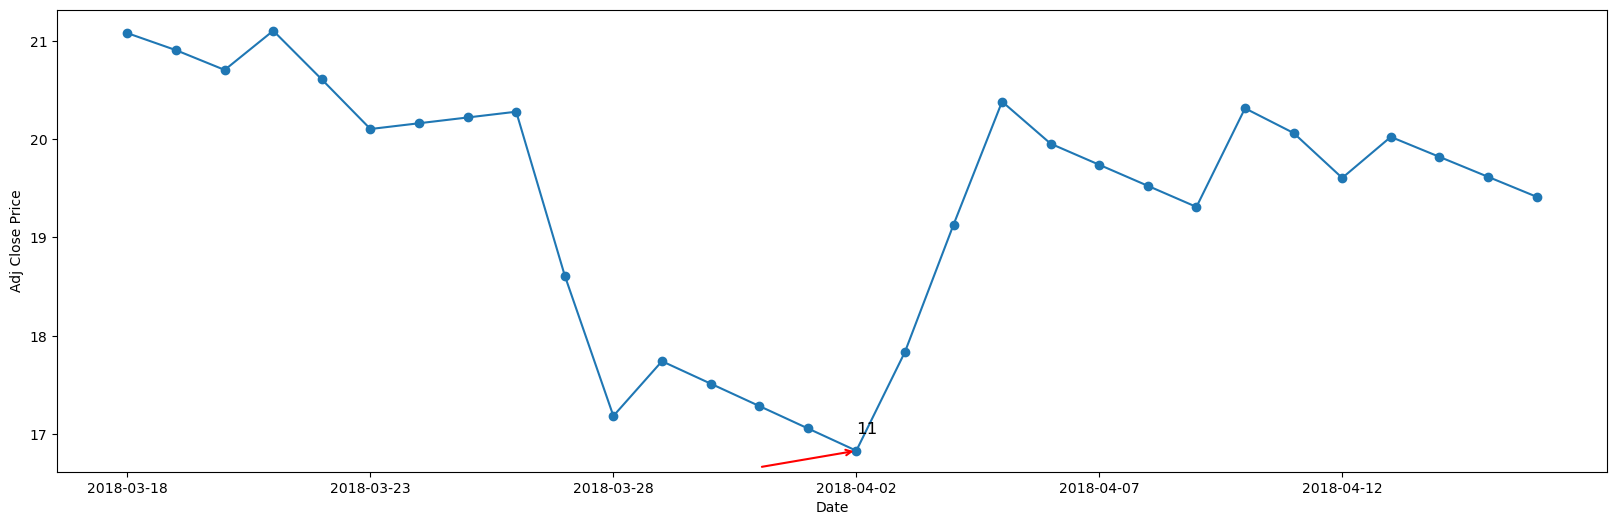

-----------------------------------------------------------------------
Engagement Metric:  300106
Number of Tweets and replies:  5
Lovely story  | It’s super messed up that a Tesla crash resulting in a broken ankle is front page news and the ~40,000 people who died in US auto accidents alone in past year get almost no coverage  | According to NHTSA, there was an automotive fatality every 86M miles in 2017 (~40,000 deaths). Tesla was every 320M miles. It’s not possible to be zero, but probability of fatality is much lower in a Tesla. We will be reporting updated safety numbers after each quarter.| This is false. Eyetracking rejected for being ineffective, not for cost. WSJ fails to mention that Tesla is safest car on road, which would make article ridiculous. Approx 4X better than avg.| What’s actually amazing about this accident is that a Model S hit a fire truck at 60mph and the driver only broke an ankle. An impact at that speed usually results in severe injury or death.


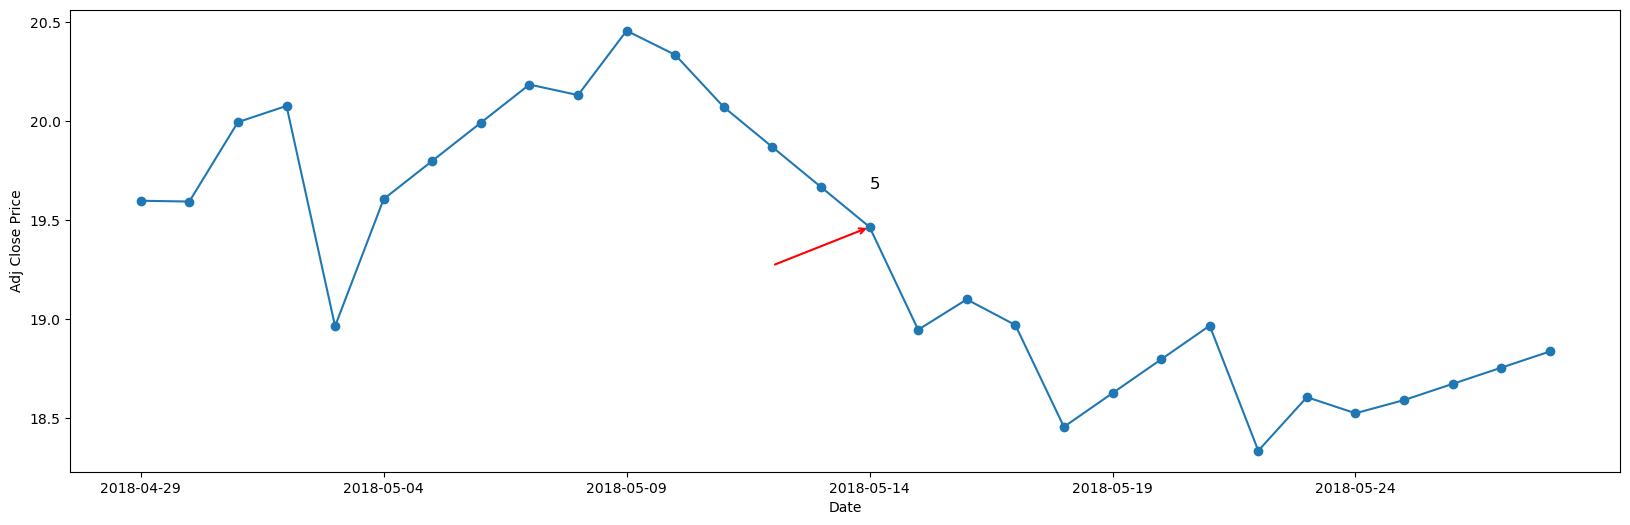

-----------------------------------------------------------------------
Engagement Metric:  249278
Number of Tweets and replies:  5
Exactly. A Tesla is objectively much safer in a crash than all other cars, according to NHTSA’s *own* calculations. This is just physics!| Yes, it’s hard to find. Not sure why.| Beautiful picture| Teslaquila coming soon …| Tesla exists to help reduce risk of catastrophic climate change, which affects all species on Earth. Even if your faith in humanity is faltering, this is worth caring about. Support makes a difference. Thank you.


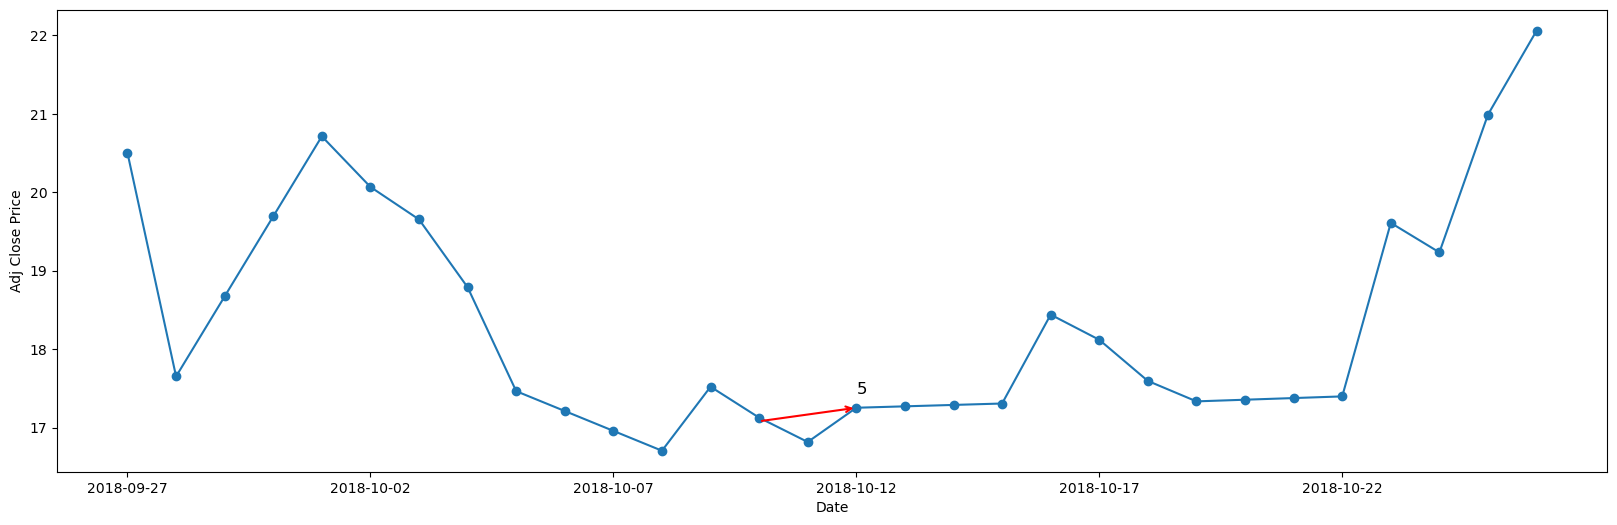

-----------------------------------------------------------------------
Engagement Metric:  367267
Number of Tweets and replies:  2
4000 Tesla cars loading in SF for Europe  | Tesla made 0 cars in 2011, but will make around 500k in 2019


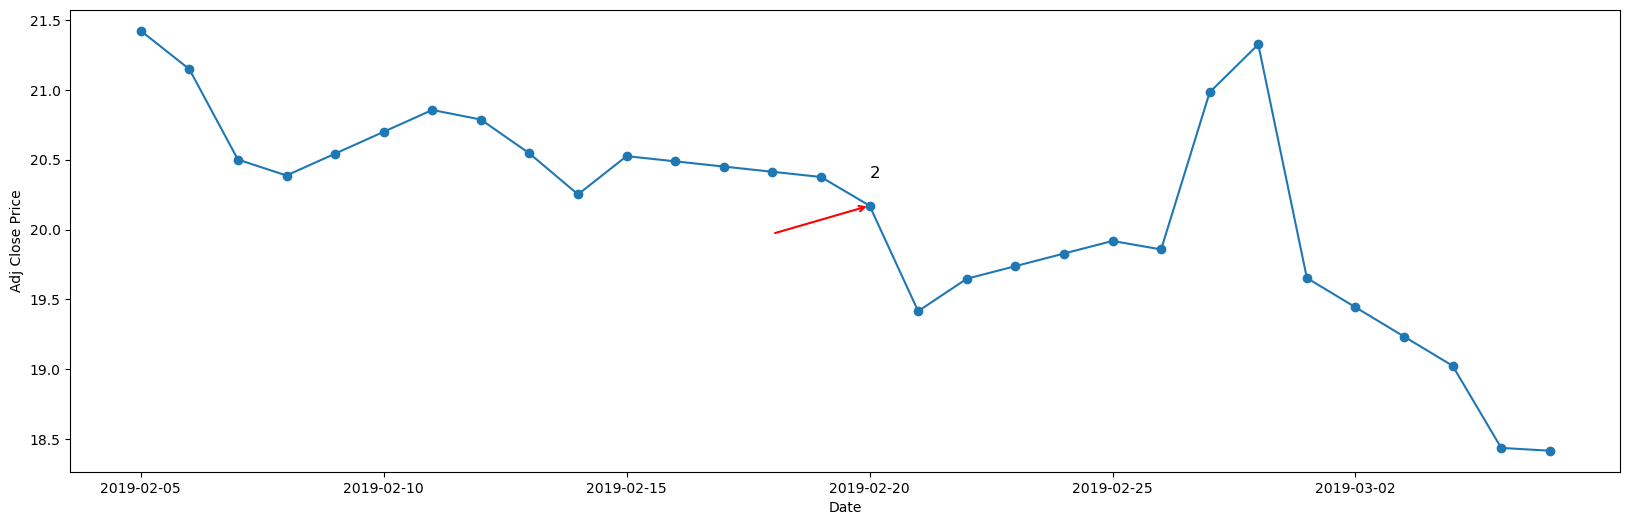

-----------------------------------------------------------------------
Engagement Metric:  594512
Number of Tweets and replies:  17
Can order online in 2 mins for home delivery &amp; return in 7 days for full refund  | Model S drives from San Francisco to Los Angeles without recharging  | Motor Trend on Model S updates  | As mentioned before, Tesla full self-driving option price will increase after May 1. You can order online at  | New Model S has 370 mile / 595 km range| Thanks, support super appreciated| Will do| This require hardware| Those who predicted Tesla &amp; EVs would be dead &amp; autonomy would never happen are same people attacking Tesla today for 6-12 month delays, while ignoring major automakers 5+ years late. Why the double standard?| Over a million combustion engine (it’s right there in the name!) car fires per year &amp; thousands of deaths, but one Tesla car fire with no injuries gets biggest headlines. Why the double standard? This is a real question.| Reality is 

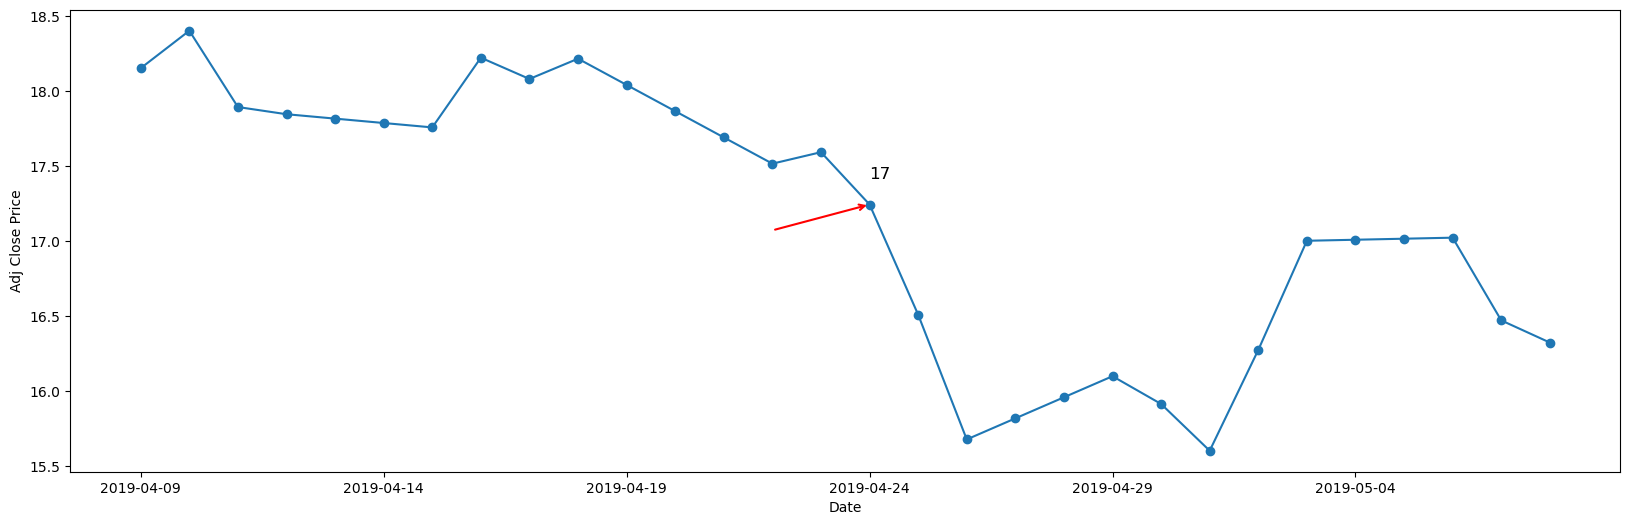

-----------------------------------------------------------------------
Engagement Metric:  255330
Number of Tweets and replies:  9
Model 3 Standard Range+ with Autopilot lease is $399/month at   but lots of other EVs available:  | There are people not on Twitter!? Where are they?| Oh. They have nice pictures there.| We’re closing the loop on Autobahn driving. Will improve dramatically in coming months. Ultra gemütlich.| He’s just kidding, folks, but best to turn car off just in case. Also 2001 was 18 years ago.| Just behind the glovebox, which is, presumably, where the gloves are| Probably shouldn’t have called holding company Cyberdyne Systems 😔| Even though lease cost is lower, I recommend purchase, as buyer retains upside value of car vs lease where you have give it back to Tesla| Turns out there’s more ways to use Autopilot than we imagined


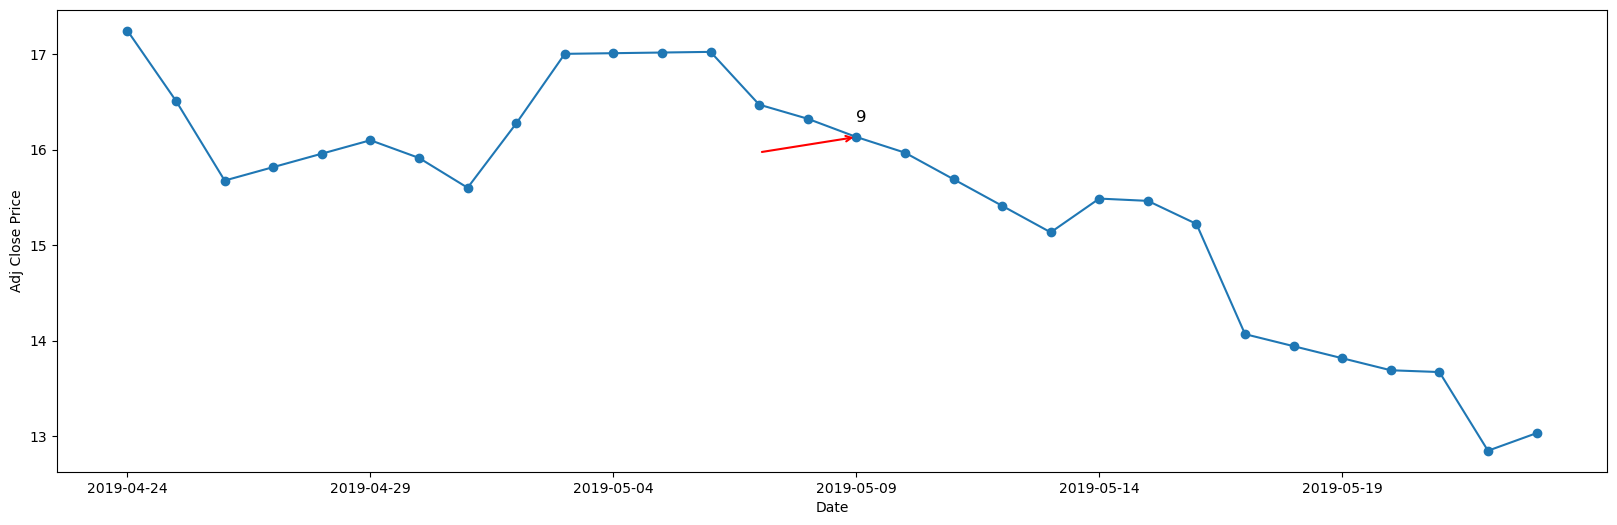

-----------------------------------------------------------------------
Engagement Metric:  384078
Number of Tweets and replies:  1
A friend just sent me this excerpt from a Tesla blog I wrote 14 years ago  


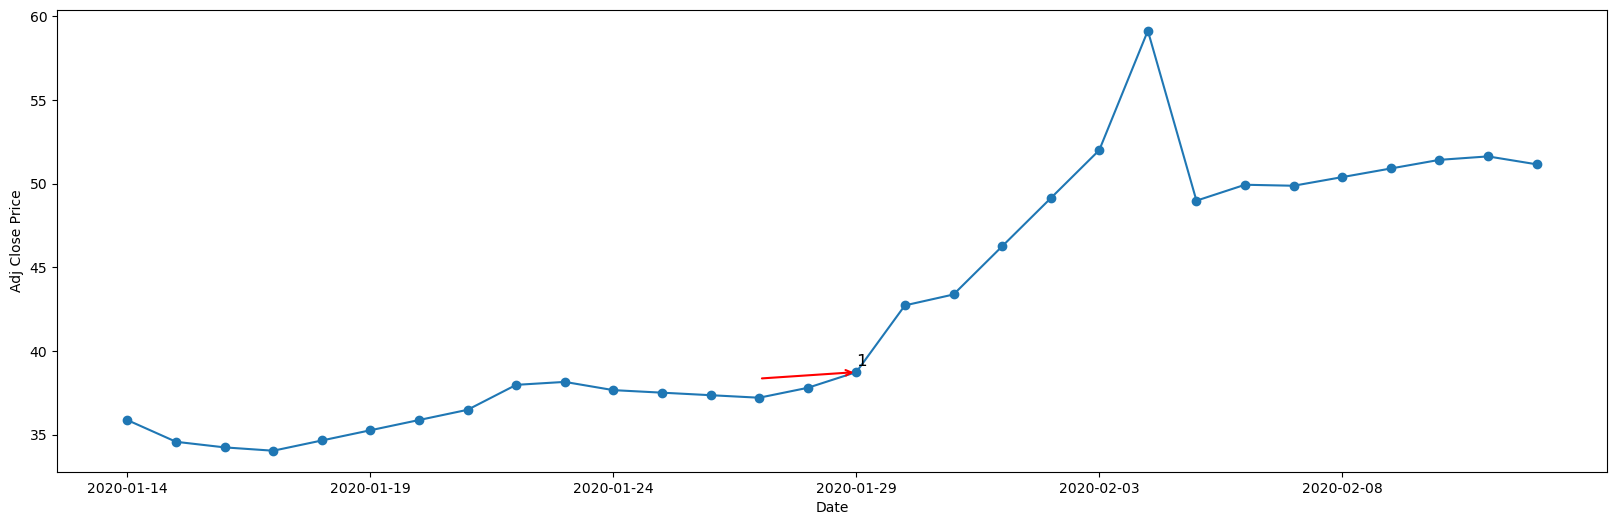

-----------------------------------------------------------------------
Engagement Metric:  357029
Number of Tweets and replies:  2
Congratulations Tesla team on making our 1,000,000th car!!  | Tesla should have a mega rave cave under the Berlin Gigafatory


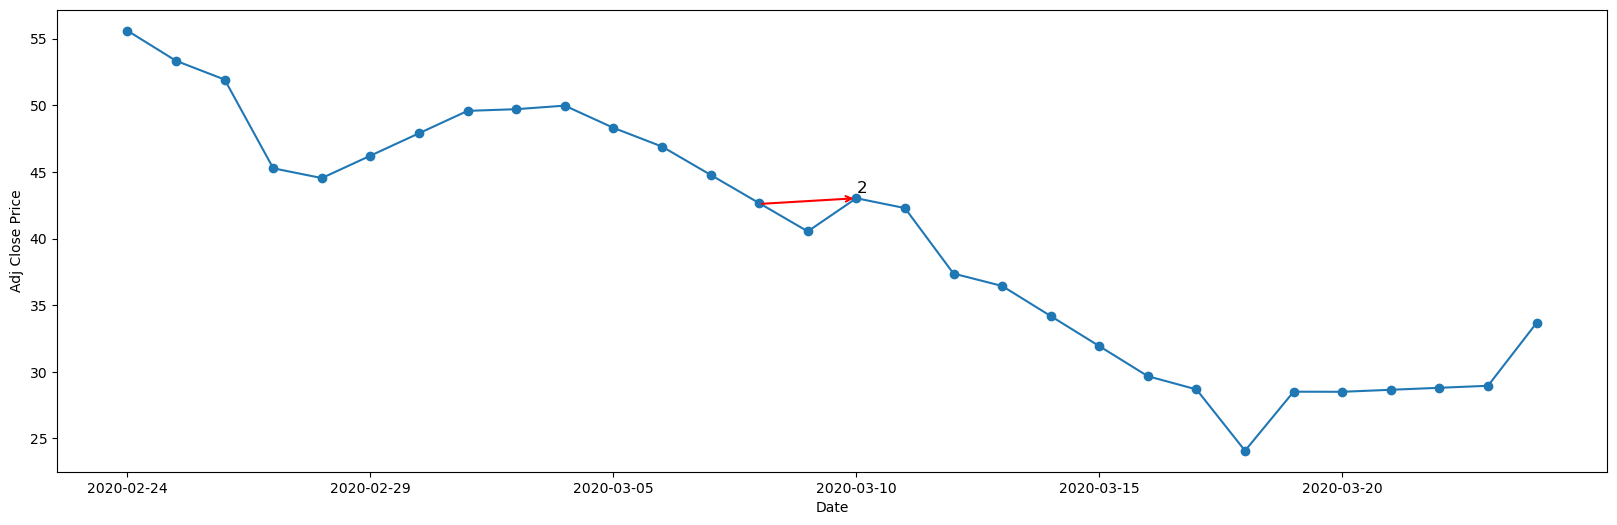

-----------------------------------------------------------------------
Engagement Metric:  396984
Number of Tweets and replies:  3
We have extra FDA-approved ventilators. Will ship to hospitals worldwide within Tesla delivery regions. Device &amp; shipping cost are free. Only requirement is that the vents are needed immediately for patients, not stored in a warehouse. Please me or know.| The legs extend &amp; telescope out, so are longer than they seem, but not as long as they will be for SN4+| Happy we could be helpful! More available if needed.


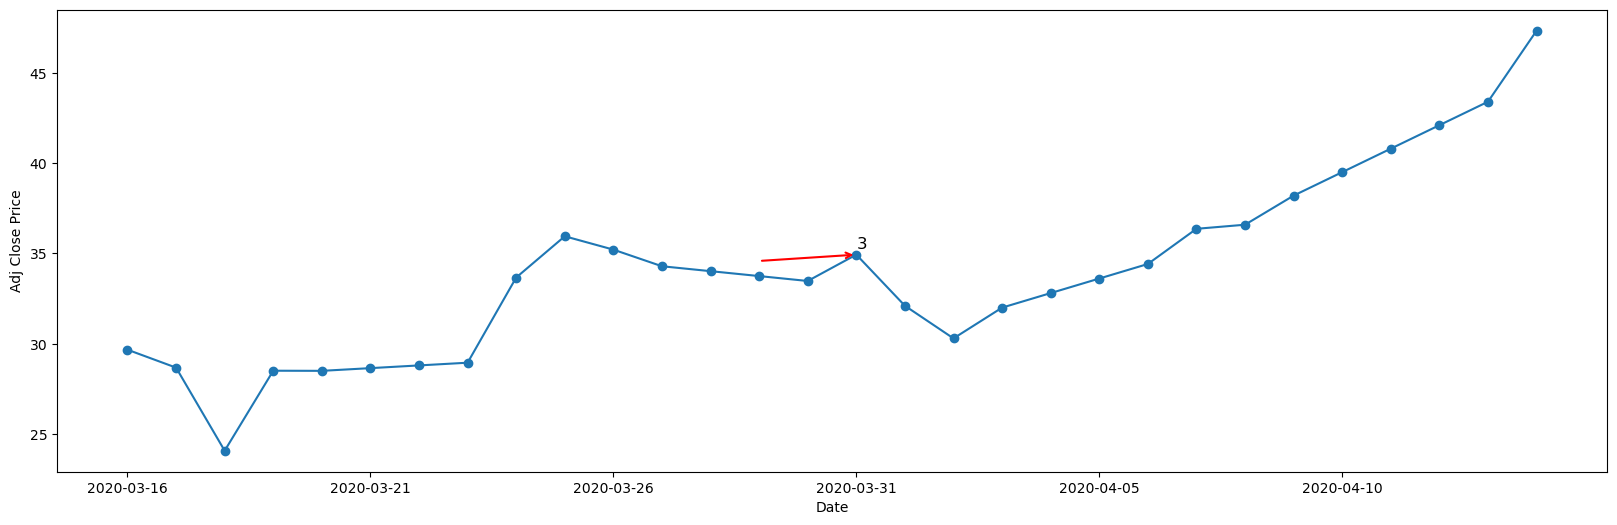

-----------------------------------------------------------------------
Engagement Metric:  724492
Number of Tweets and replies:  10
This thread summarizes situation perfectly| Absolutely| Good summary| Yes, this is insane| Interesting| Note is much appreciated| Thank you Governor Newsom!| Yes, California approved, but an unelected county official illegally overrode. Also, all other auto companies in US are approved to resume. Only Tesla has been singled out. This is super messed up!| Thanks for the cool suggestions 😀❤️👍 More fun coming to your Tesla soon!| Tesla is restarting production today against Alameda County rules. I will be on the line with everyone else. If anyone is arrested, I ask that it only be me.


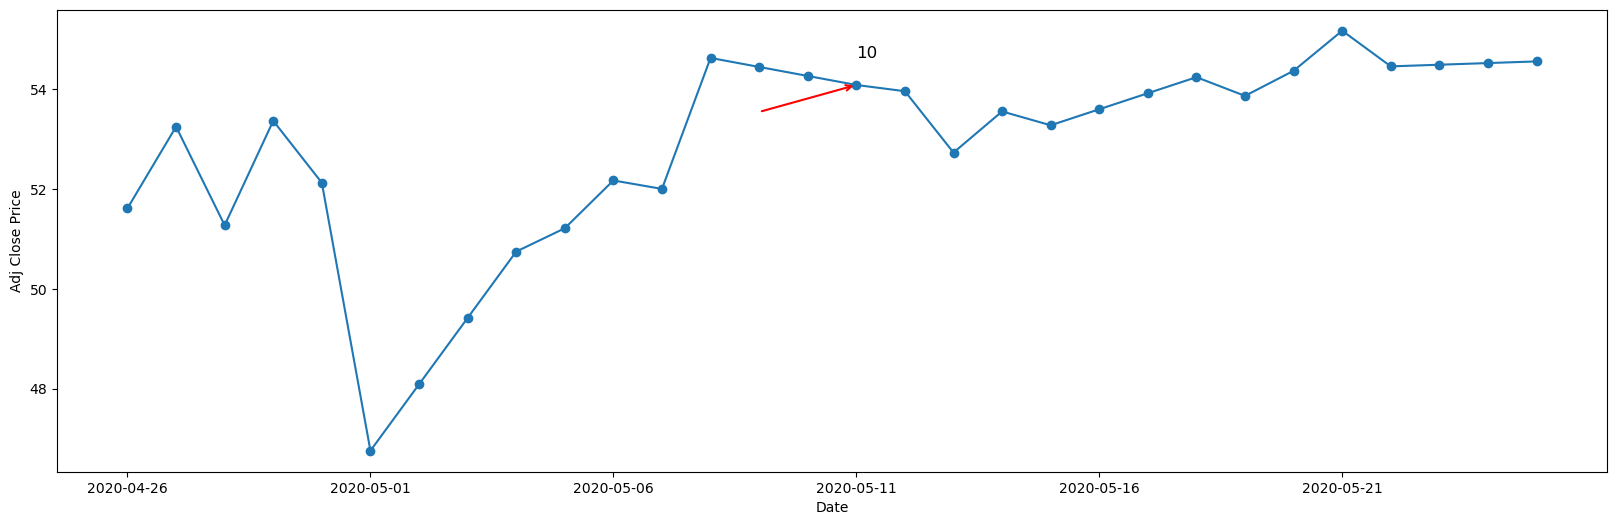

-----------------------------------------------------------------------
Engagement Metric:  450180
Number of Tweets and replies:  4
We are considering several options| Opening in about two weeks| Moving fast| Juneteenth is henceforth considered a US holiday at Tesla &amp; SpaceX


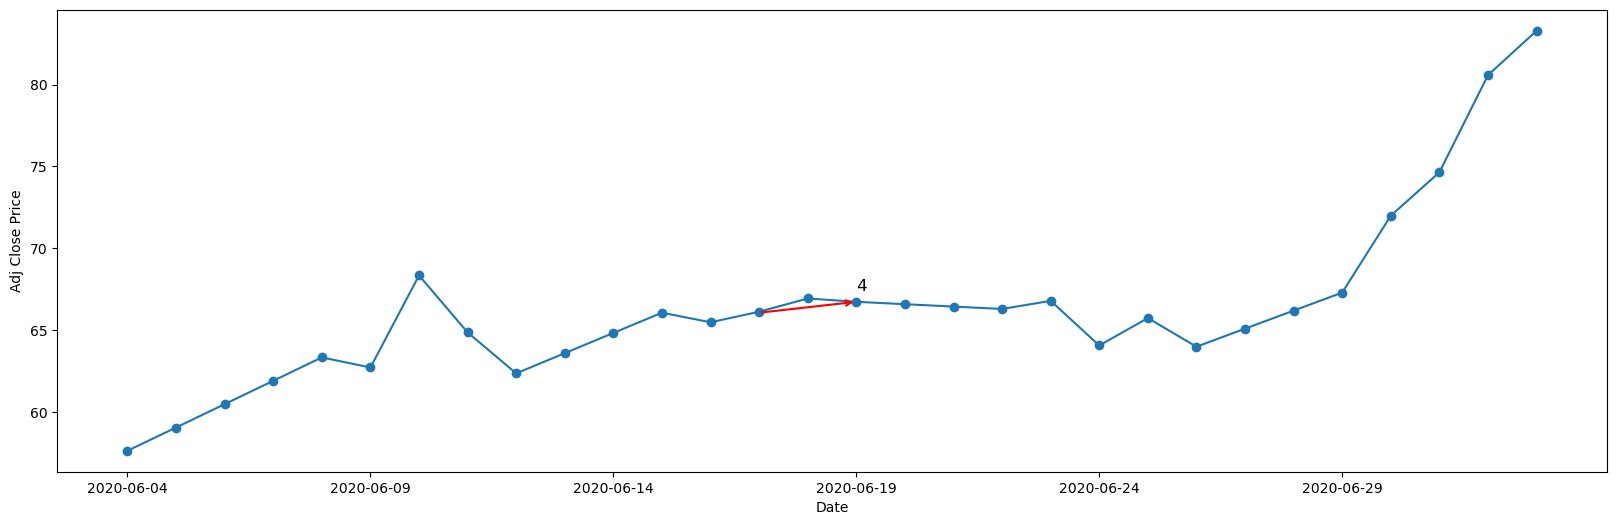

-----------------------------------------------------------------------
Engagement Metric:  413638
Number of Tweets and replies:  7
Glad you’re ok| Very meta, but yes| Glad you like it!| Giga Berlin is gonna rock!| Absolutely!| Jay is awesome| Only a matter of time before someone steals a Tesla while playing GTA on a Tesla


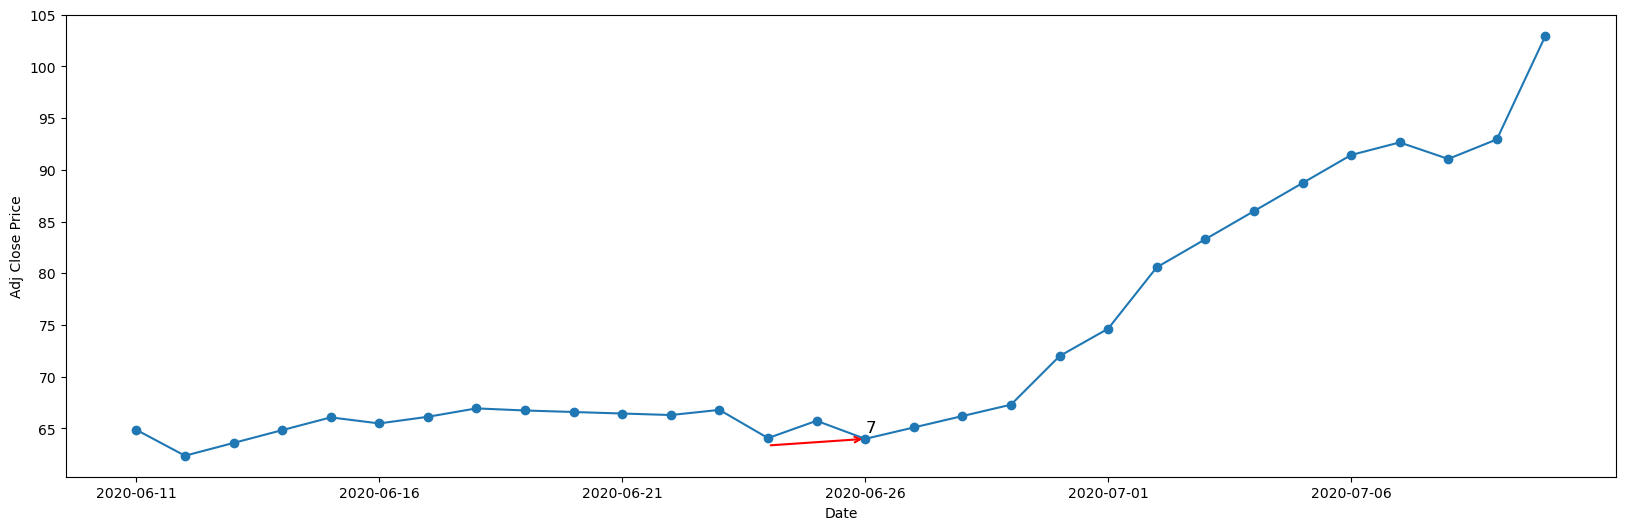

-----------------------------------------------------------------------
Engagement Metric:  264234
Number of Tweets and replies:  12
Thanks Tesla owners &amp; investors! Love you!! We will work super hard to earn your trust &amp; support.| Wow, I’ve never seen this level of support! Out of respect, seems like I should at least visit.| I love Texas! Starship production complex is in Boca Chica &amp; SpaceX engine development has been in McGregor for almost 18 years.| A lot of functionality will happen all at once when we transition to the new software stack. Most likely, it will be releasable in 2 to 4 months. Then it’s a question of what functionality is proven safe enough to enable for owners.| In principle, I think synthetic RNA (and DNA) has amazing potential. This basically makes the solution to many diseases a software problem.| Tesla, as a side project, is building RNA microfactories for CureVac &amp; possibly others| Yes, at Tesla Grohmann| Lithium is common. Hard part is turnin

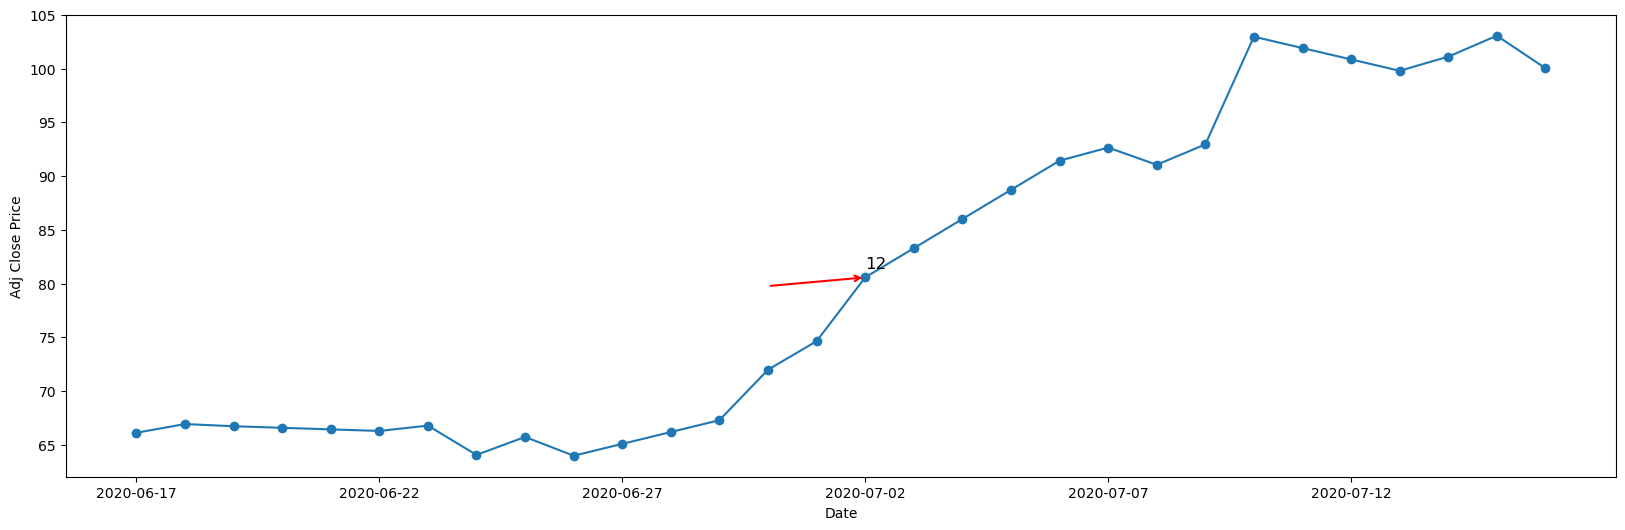

-----------------------------------------------------------------------
Engagement Metric:  439688
Number of Tweets and replies:  3
Or a self-perpetuating autocracy based on a farcical aquatic ceremony where the king is chosen by a wise panzer in a lake| New Tesla feature coming that enables your car to play snake jazz or Polynesian elevator music through its outside speakers wherever you go| More fun games coming soon to ur Tesla


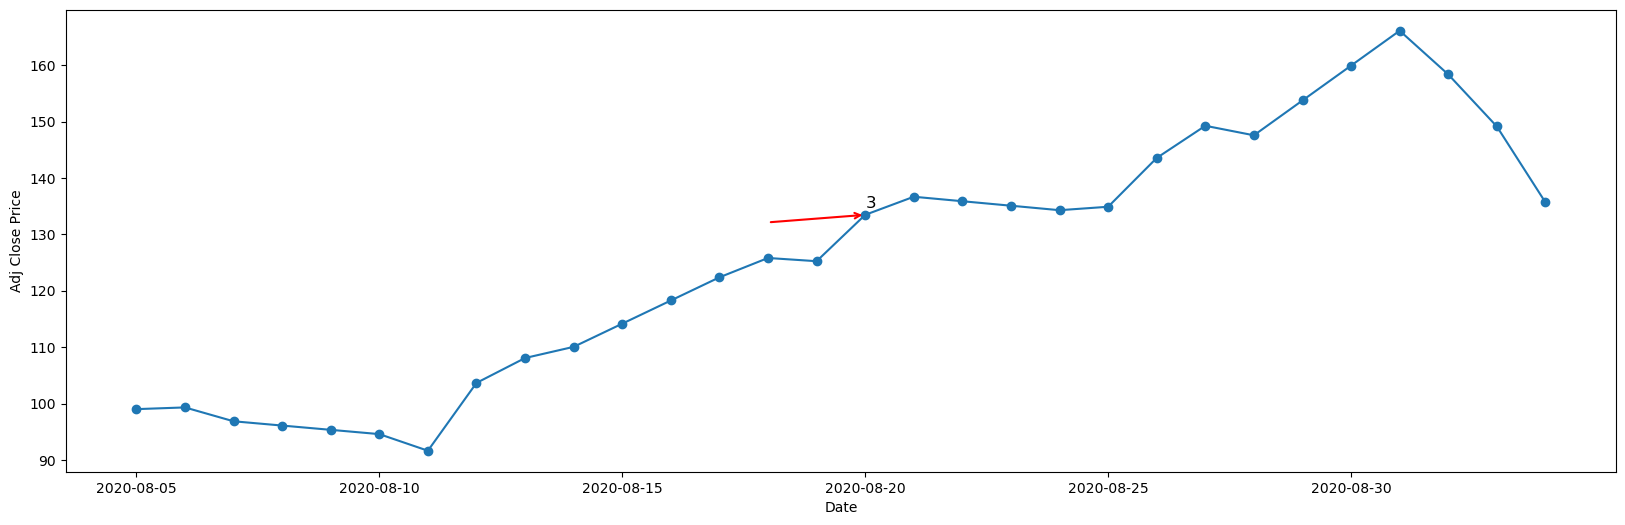

-----------------------------------------------------------------------
Engagement Metric:  409758
Number of Tweets and replies:  8
We simplified this a lot. It’s basically just Teslas in tunnels at this point, which is way more profound than it sounds.| Maybe a month or so. Some finishing touches need to be done on the stations.| For sure| It’s still there, but focus is Vegas &amp; Prufrock, our new tunneling machine| Making progress| Congratulations!| Starting production on 7 seater next month, initial deliveries early December| The gauntlet has been thrown down!   The prophecy will be fulfilled.   Model S price changes to $69,420 tonight!


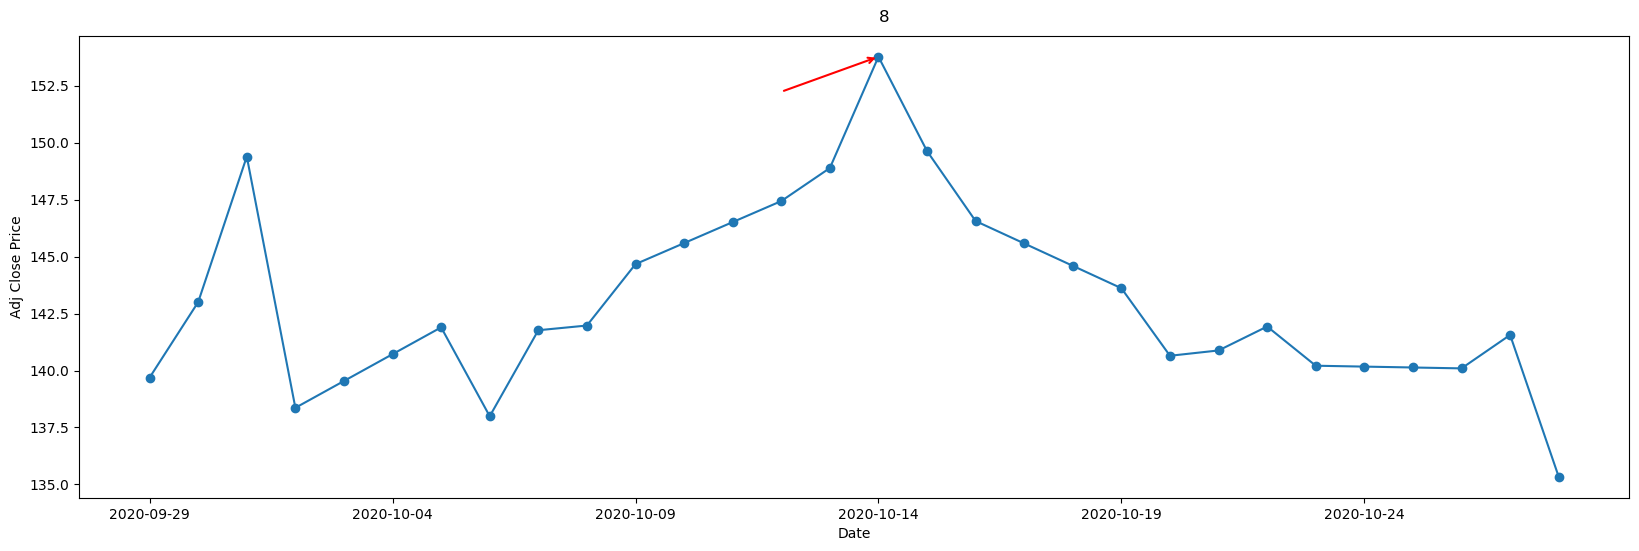

-----------------------------------------------------------------------
Engagement Metric:  411335
Number of Tweets and replies:  4
Indeed| Hi Liz!| They are, although it’s kind low-key. Tesla Superchargers are being made accessible to other electric cars.| Thanks to everyone who worked so hard to make Tesla successful. My heart goes out to you.


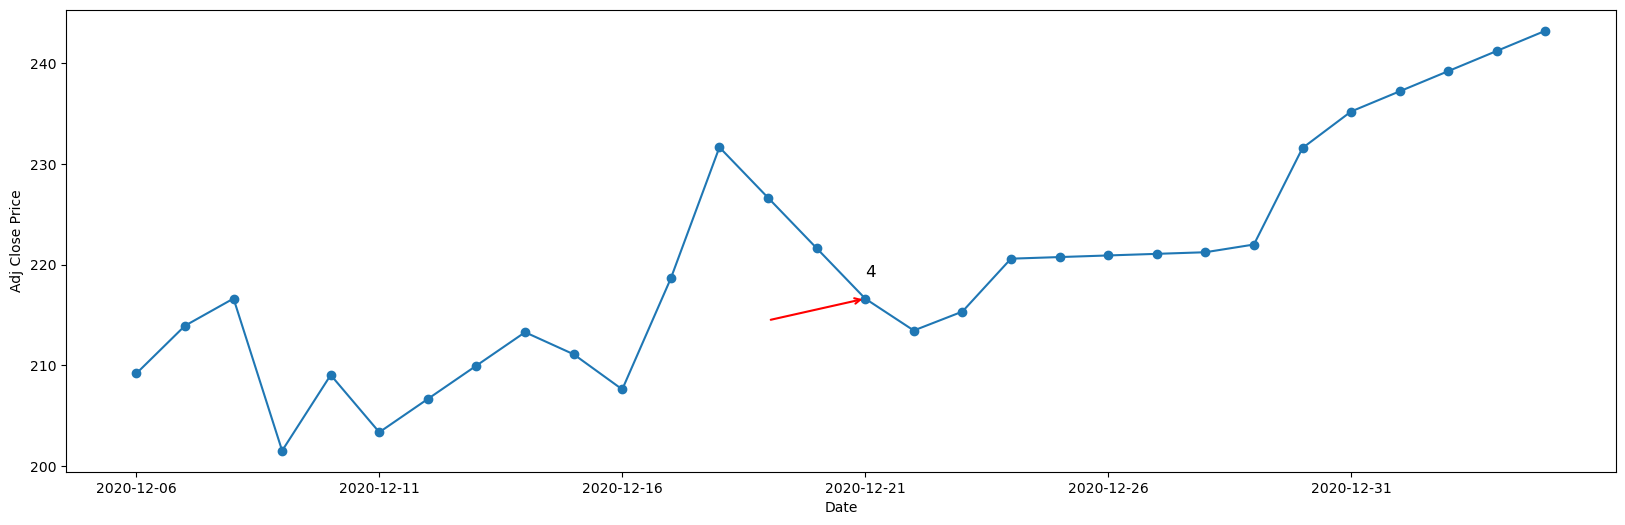

-----------------------------------------------------------------------
Engagement Metric:  378088
Number of Tweets and replies:  3
How strange| Well, back to work …| This will be hard to make, as it isn’t like any other vehicle


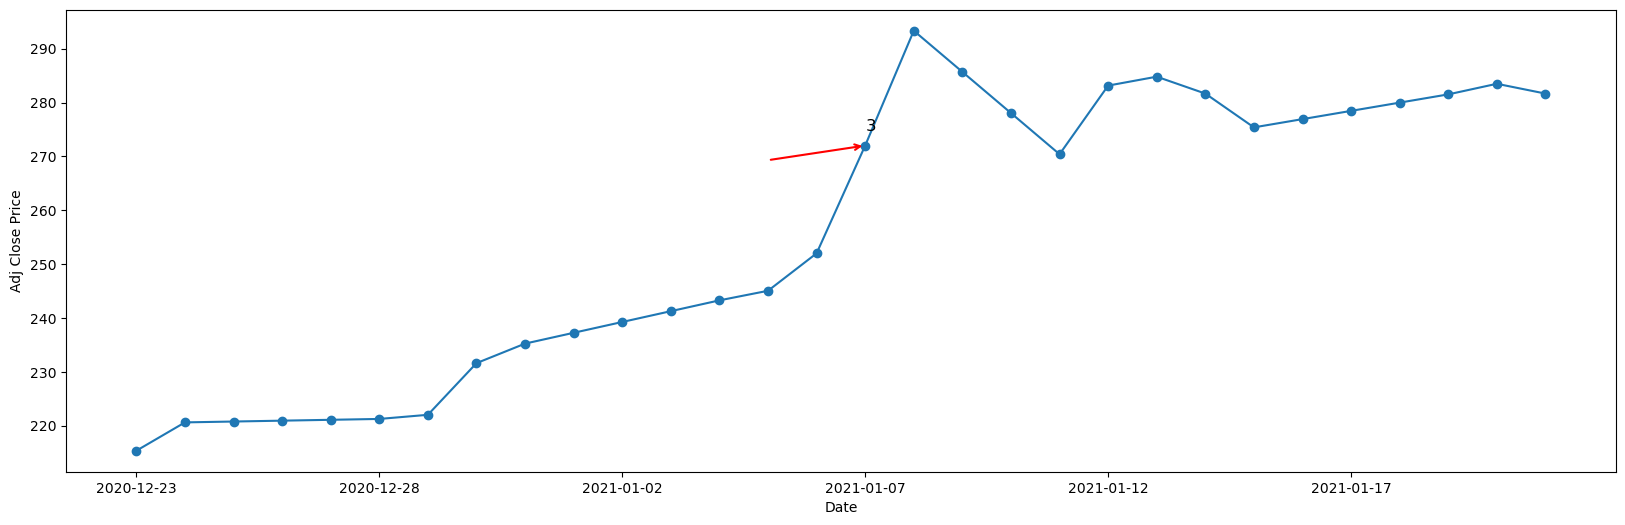

-----------------------------------------------------------------------
Engagement Metric:  537701
Number of Tweets and replies:  3
Yeah, probably in a few months| A little| Plaid Model S ships next month  


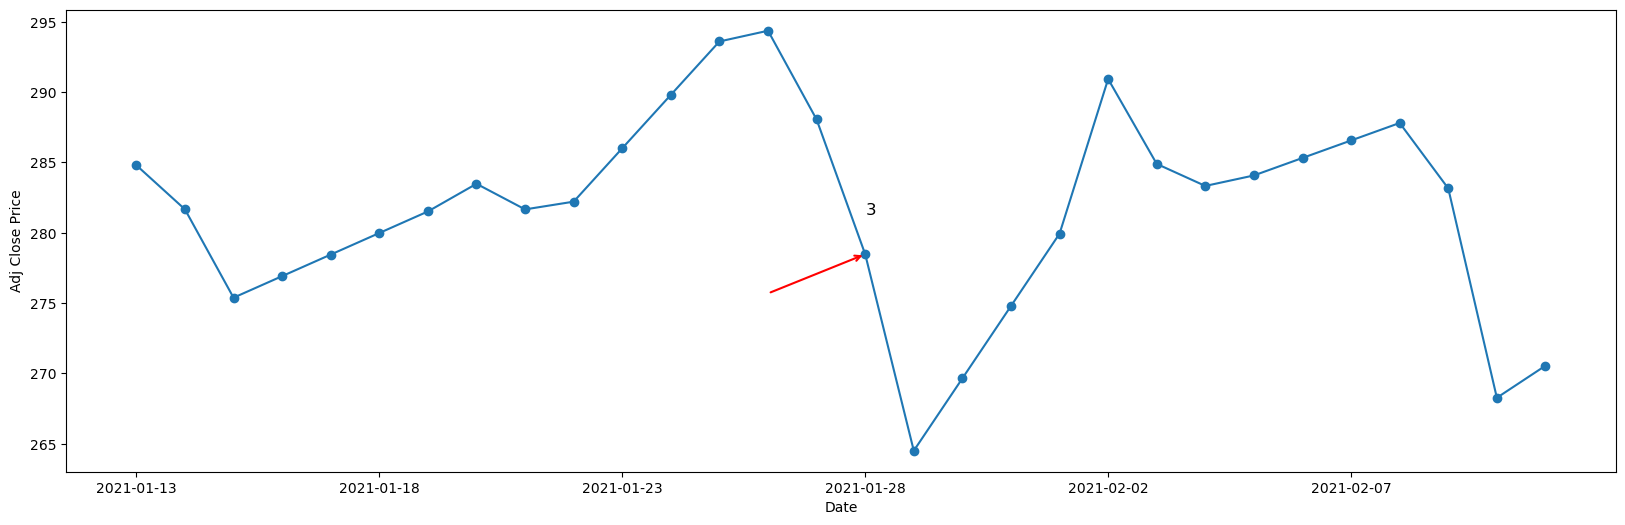

-----------------------------------------------------------------------
Engagement Metric:  451365
Number of Tweets and replies:  1
Time to tell the story of Tesla &amp; SpaceX


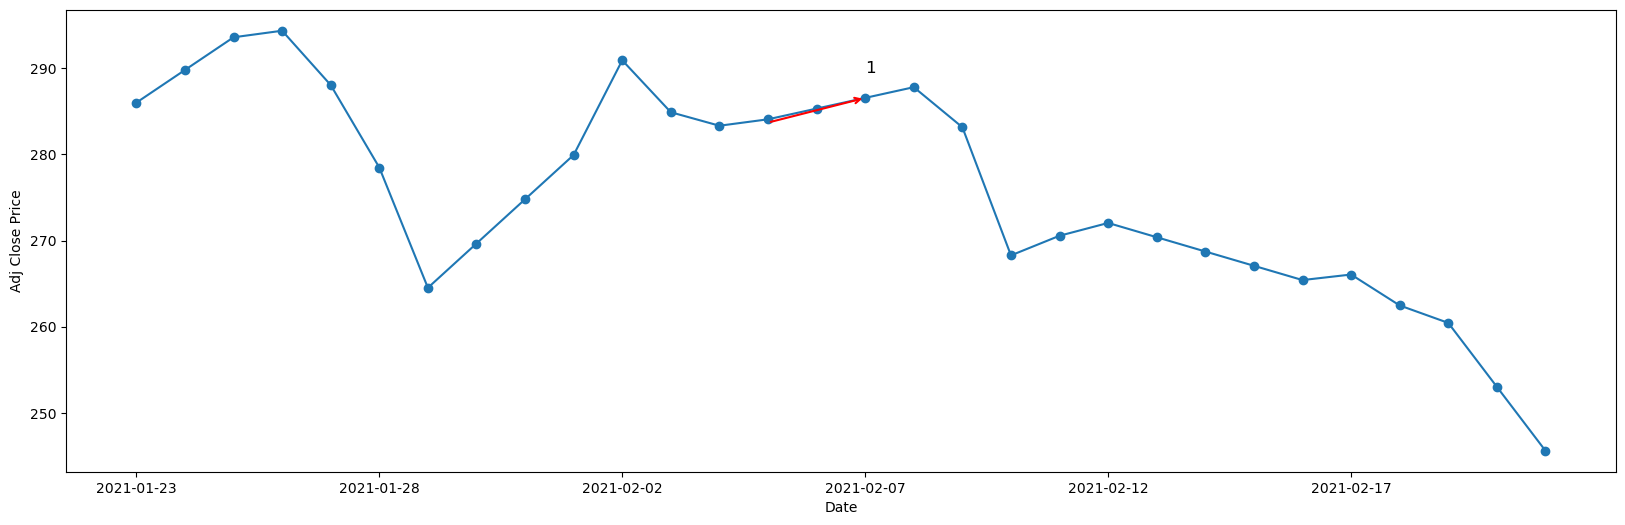

-----------------------------------------------------------------------
Engagement Metric:  1260348
Number of Tweets and replies:  2
You can now buy a Tesla with Bitcoin| Tesla is using only internal &amp; open source software &amp; operates Bitcoin nodes directly.  Bitcoin paid to Tesla will be retained as Bitcoin, not converted to fiat currency.


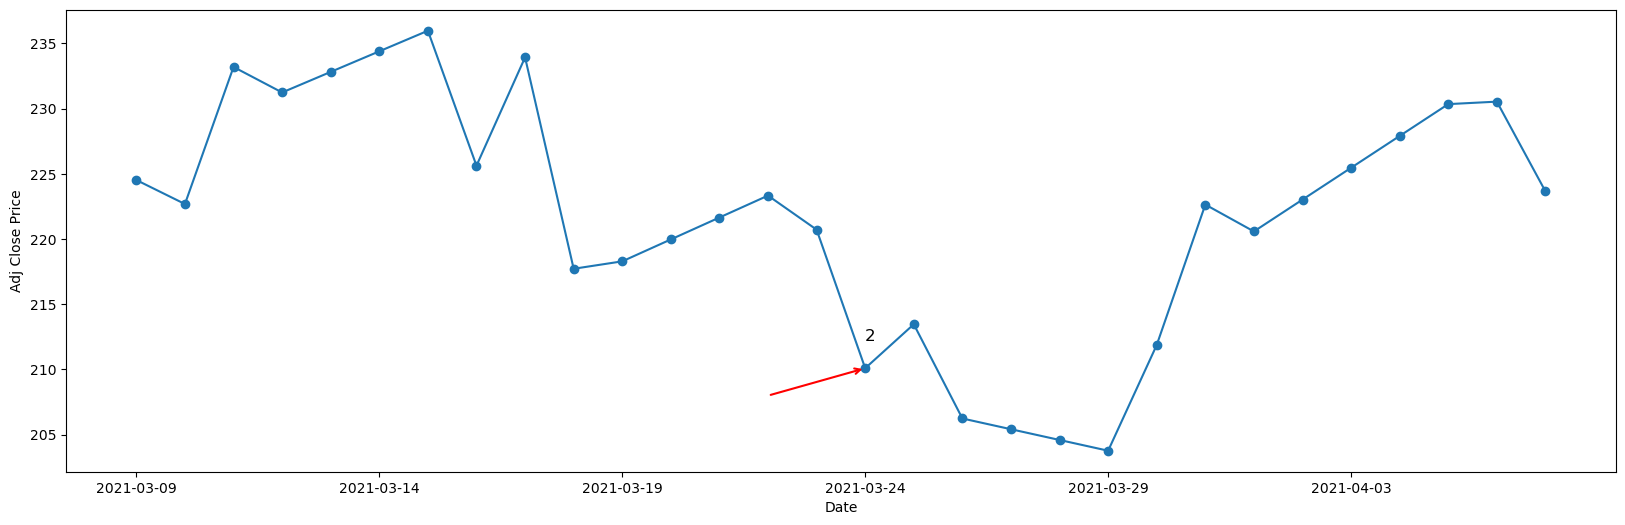

In [220]:
tweet_number=0

for i in top_20_tweets.index:
    
    j=str(i)[:10]
    start_date=i-timedelta(days=15)
    end_date=i+timedelta(days=15)    

    start_date=str(start_date)[:10]
    end_date=str(end_date)[:10]
    tweet_number=tweet_number+1

    print('-----------------------------------------------------------------------')
    #print(tweet_number)
    print('Engagement Metric: ',(top_20_tweets.loc[j,'engagement']))
    print('Number of Tweets and replies: ',(top_20_tweets.loc[j,'tweet_counts']))
    print(top_20_tweets.loc[j,'tweet_hashtags'])
    tesla_tmp=tesla_interpolated[tesla_interpolated.index>=start_date]
    tesla_tmp=tesla_tmp[tesla_tmp.index<end_date]
    
    x=tesla_tmp.index
    y=tesla_tmp['Value']
    
    
    fig, ax = plt.subplots(figsize=(20, 6))
    ax.plot(x, y, 'o-')
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Adj Close Price')
    #ax.set_title('Tesla Close Price')
    
    
    # text is left-aligned '2021-03-22', 210
    j_value=tesla_tmp.loc[j,'Value']
    number_of_tweets=top_20_tweets.loc[j,'tweet_counts']
    
    plt.text(j, 1.01*(j_value), str(number_of_tweets) ,fontsize=12)

    # Add an arrow pointing to the text
    
    xytext=i-timedelta(days=2)
    xytext=str(xytext)[:10]
    ax.annotate('',
                xy=(j, j_value),
                xytext=(xytext, .99*(j_value)),
                arrowprops=dict(arrowstyle='->', color='red', lw=1.5))


    ax.set_xticks(x[::5])

    plt.show()


--------------------------

## Merging Tables to Do some EDA

In [221]:
tweets=tesla_tweets_grouped.copy()

In [222]:
tesla.shape, tweets.shape

((3946, 3), (1037, 3))

In [223]:
tweets.index=pd.to_datetime(tweets.index)

In [224]:
tweets.index=tweets.index+timedelta(days=1)

In [225]:
tweets.head()

,tweet_hashtags,tweet_counts,engagement
Date,,,
2011-12-02,I made the volume on the Model S go to 11. Now I just need to work in a miniature Stonehenge...,1,119
2011-12-23,Model S options are out! Performance in red and black for me. I will deliver my car in June/July.,1,541
2012-01-01,Hacked my Tesla charge connector on a small island in the rain last night #whatcouldpossiblygowrongwhatcouldpossiblygowrong,1,491
2012-01-07,Model S Signature series sold out as of today | Feb is huge month. Model X world premier and public reveal of our LA design studio on the 9th. Stay tuned for more details.,2,134
2012-01-12,"The exec conf room at Tesla used to be called Denali, but I decided to move a few letters around. Seemed more apt :)",1,416


In [226]:
tweets_tesla = pd.merge(tweets, tesla, left_index=True, right_index=True, how='inner')

In [227]:
tweets_tesla.head(2)

,tweet_hashtags,tweet_counts,engagement,Adj Close,predict,residuals
Date,,,,,,
2011-12-02,I made the volume on the Model S go to 11. Now I just need to work in a miniature Stonehenge...,1,119,2.22,2.206151,-0.032818
2011-12-23,Model S options are out! Performance in red and black for me. I will deliver my car in June/July.,1,541,1.86,1.889170,-0.037837


In [228]:
tweets_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1036 entries, 2011-12-02 to 2021-04-17
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_hashtags  1036 non-null   object 
 1   tweet_counts    1036 non-null   int64  
 2   engagement      1036 non-null   int64  
 3   Adj Close       1036 non-null   float64
 4   predict         1033 non-null   float64
 5   residuals       1033 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 56.7+ KB


In [229]:
tweets_tesla['Change'] = tweets_tesla['Adj Close'].div(tweets_tesla['Adj Close'].shift())

In [230]:
tweets_tesla['Change_sign'] = tweets_tesla['Change'].apply(lambda x: 1 if x>=1 else 0)

In [231]:
tweets_tesla['res_sign'] = tweets_tesla['residuals'].apply(lambda x: 1 if x>=0 else 0)

In [232]:
tweets_tesla.head(5)

,tweet_hashtags,tweet_counts,engagement,Adj Close,predict,residuals,Change,Change_sign,res_sign
Date,,,,,,,,,
2011-12-02,I made the volume on the Model S go to 11. Now I just need to work in a miniature Stonehenge...,1,119,2.220000,2.206151,-0.032818,NaN,0,0
2011-12-23,Model S options are out! Performance in red and black for me. I will deliver my car in June/July.,1,541,1.860000,1.889170,-0.037837,0.837838,0,0
2012-01-01,Hacked my Tesla charge connector on a small island in the rain last night #whatcouldpossiblygowrongwhatcouldpossiblygowrong,1,491,1.888000,1.951884,-0.055884,1.015054,1,0
2012-01-07,Model S Signature series sold out as of today | Feb is huge month. Model X world premier and public reveal of our LA design studio on the 9th. Stay tuned for more details.,2,134,1.801556,1.864732,-0.070732,0.954214,0,0
2012-01-12,"The exec conf room at Tesla used to be called Denali, but I decided to move a few letters around. Seemed more apt :)",1,416,1.883333,1.877304,0.004696,1.045393,1,1


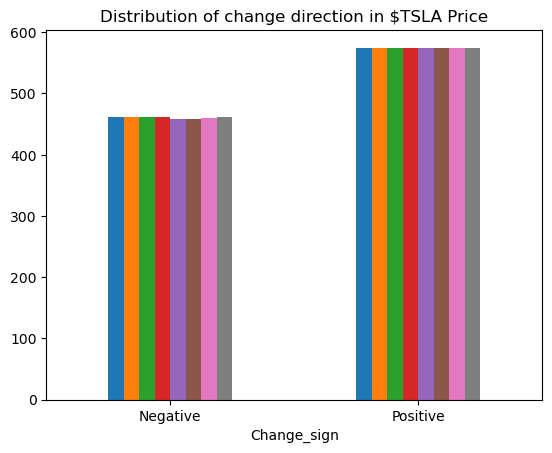

In [233]:
# Plotting the distribution for change sign
ax = tweets_tesla.groupby('Change_sign').count().plot(kind='bar', title='Distribution of change direction in $TSLA Price',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(tweets_tesla['tweet_hashtags']), list(tweets_tesla['Change_sign'])

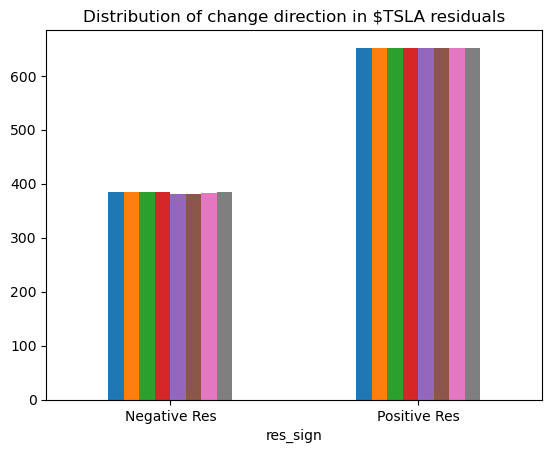

In [234]:
# Plotting the distribution for res_sign
ax = tweets_tesla.groupby('res_sign').count().plot(kind='bar', title='Distribution of change direction in $TSLA residuals',legend=False)
ax.set_xticklabels(['Negative Res','Positive Res'], rotation=0)
# Storing data in lists.
text, sentiment = list(tweets_tesla['tweet_hashtags']), list(tweets_tesla['Change_sign'])

In [235]:
tweets_tesla.to_csv('tweets_tesla.csv')

In [242]:
tweets_tesla['res_sign'].values

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

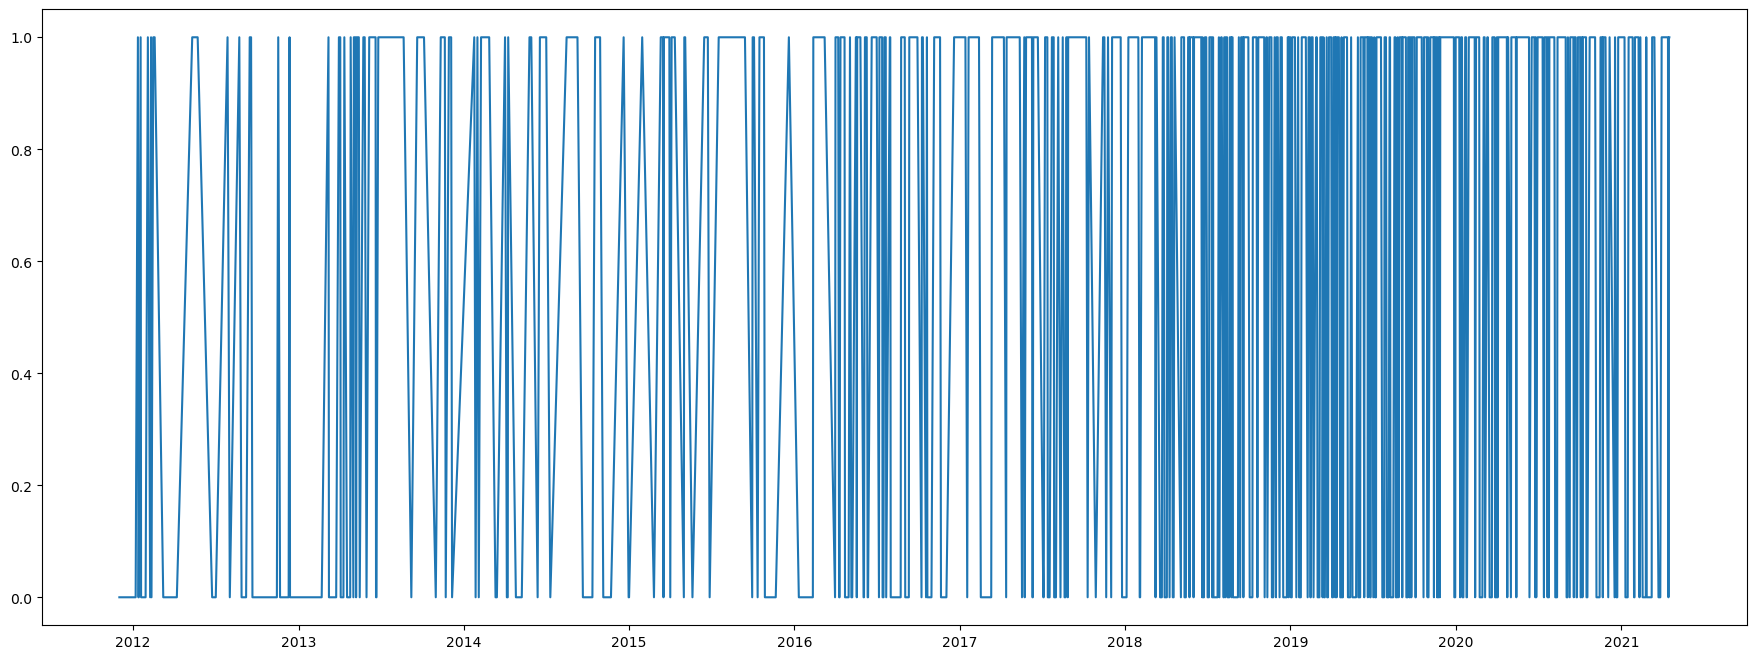

In [246]:
plt.rc("figure", figsize=(22,8))
plt.plot(tweets_tesla['res_sign'])

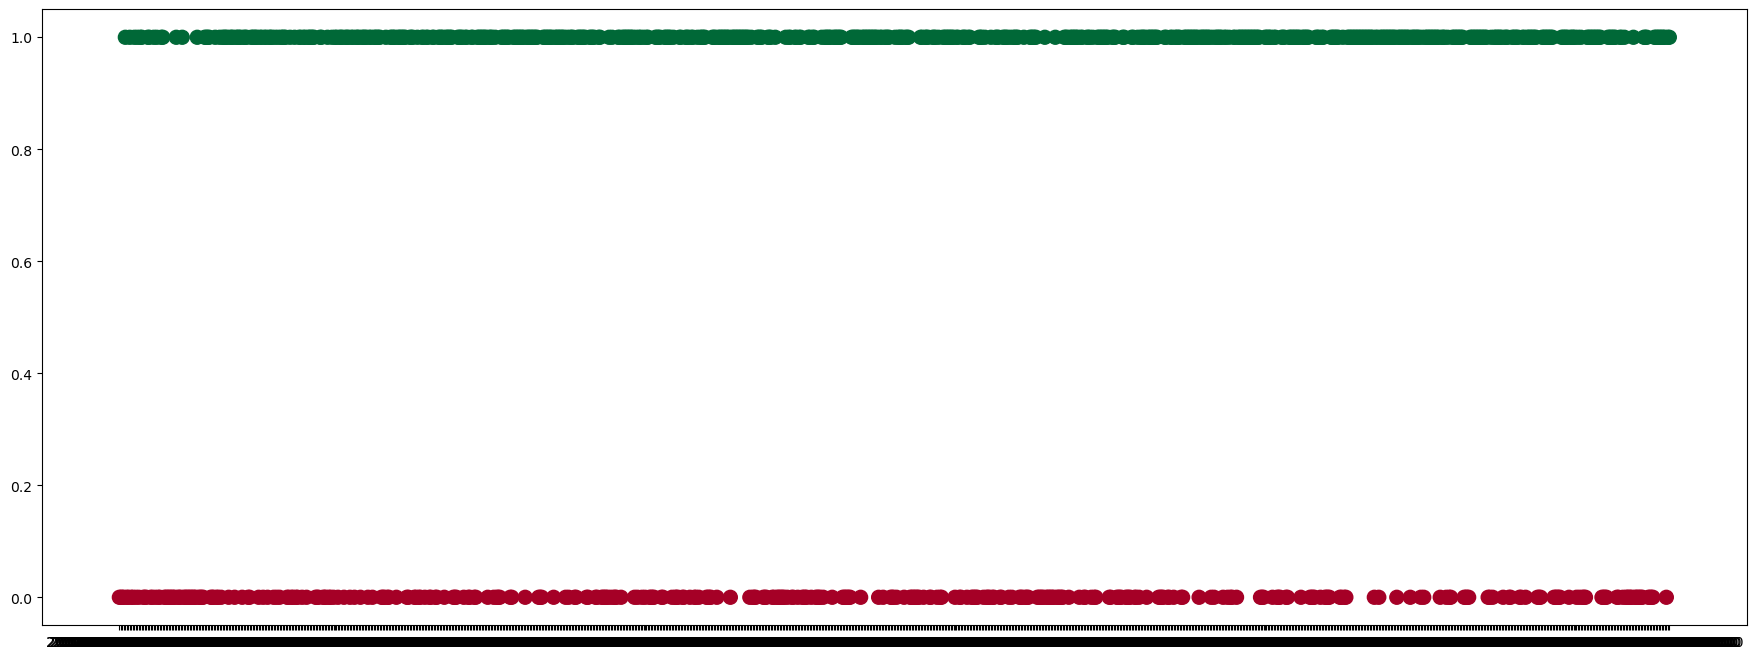

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(22,8))
# create a sample DataFrame with 0's and 1's
#df = pd.DataFrame({'A': [0, 1, 1, 0, 1, 0, 1, 0]})

# plot the column as circles
plt.scatter(range(len(tweets_tesla)), tweets_tesla['res_sign'].values, c=tweets_tesla['res_sign'].values, cmap='RdYlGn', s=100)

# set the x-axis labels
plt.xticks(range(len(tweets_tesla)), tweets_tesla.index)

# show the plot
plt.show()

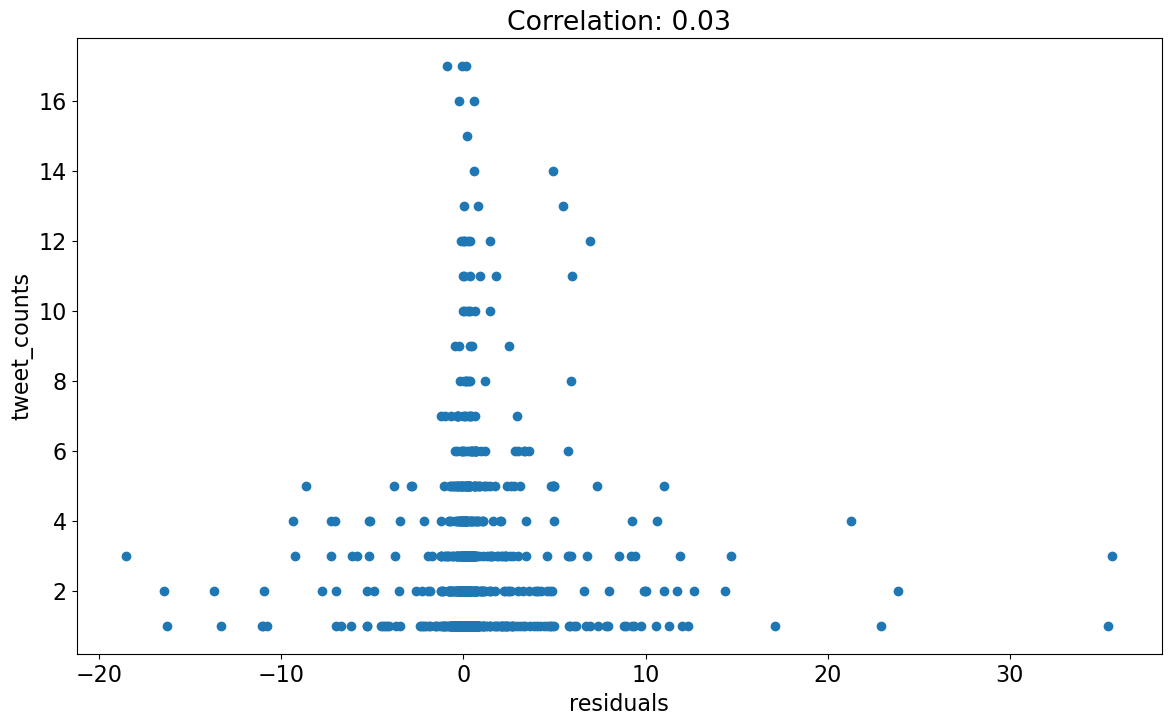

In [61]:
# calculate the correlation between columns residuals and tweet_counts
correlation = tweets_tesla['residuals'].corr(tweets_tesla['tweet_counts'])

# create a scatter plot
plt.scatter(tweets_tesla['residuals'], tweets_tesla['tweet_counts'])

# set the title and axis labels
plt.title(f'Correlation: {correlation:.2f}')
plt.xlabel('residuals')
plt.ylabel('tweet_counts')

# display the plot
plt.show()

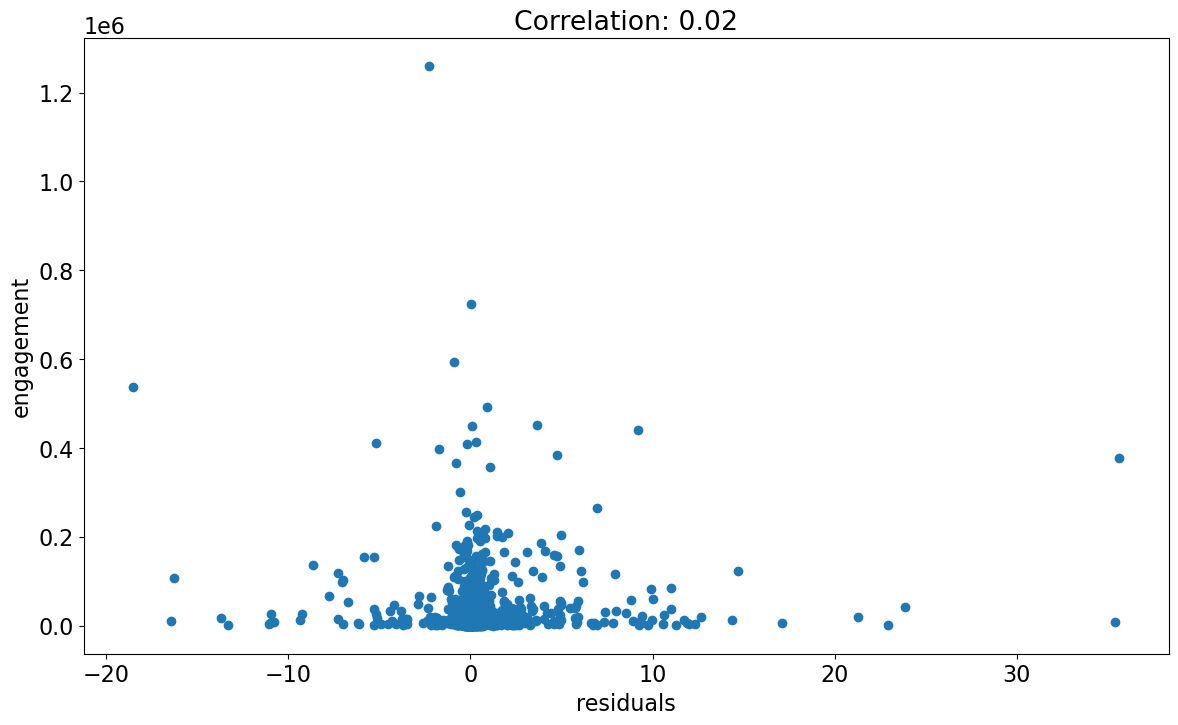

In [63]:
# calculate the correlation between columns residuals and engagement
correlation = tweets_tesla['residuals'].corr(tweets_tesla['engagement'])

# create a scatter plot
plt.scatter(tweets_tesla['residuals'], tweets_tesla['engagement'])

# set the title and axis labels
plt.title(f'Correlation: {correlation:.2f}')
plt.xlabel('residuals')
plt.ylabel('engagement')

# display the plot
plt.show()

In [64]:
positive_resid = tweets_tesla[tweets_tesla['residuals'] > 0]

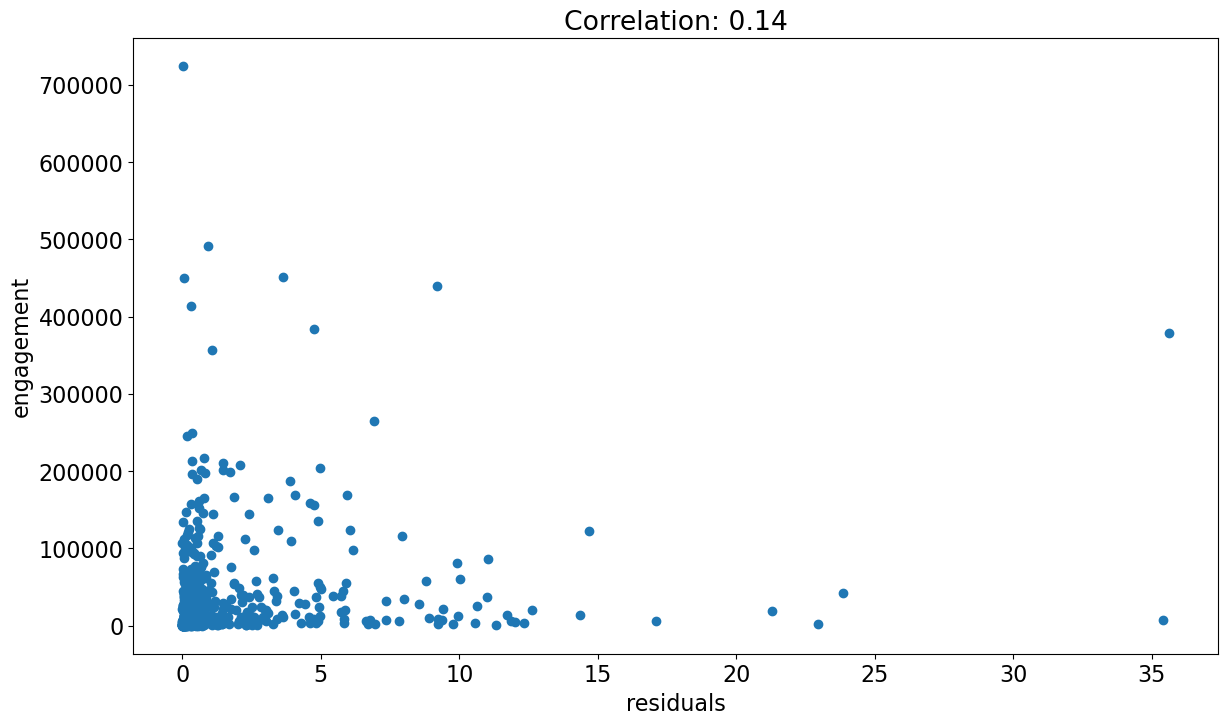

In [65]:
# calculate the correlation between columns residuals and engagement
correlation = positive_resid['residuals'].corr(positive_resid['engagement'])

# create a scatter plot
plt.scatter(positive_resid['residuals'], positive_resid['engagement'])

# set the title and axis labels
plt.title(f'Correlation: {correlation:.2f}')
plt.xlabel('residuals')
plt.ylabel('engagement')

# display the plot
plt.show()

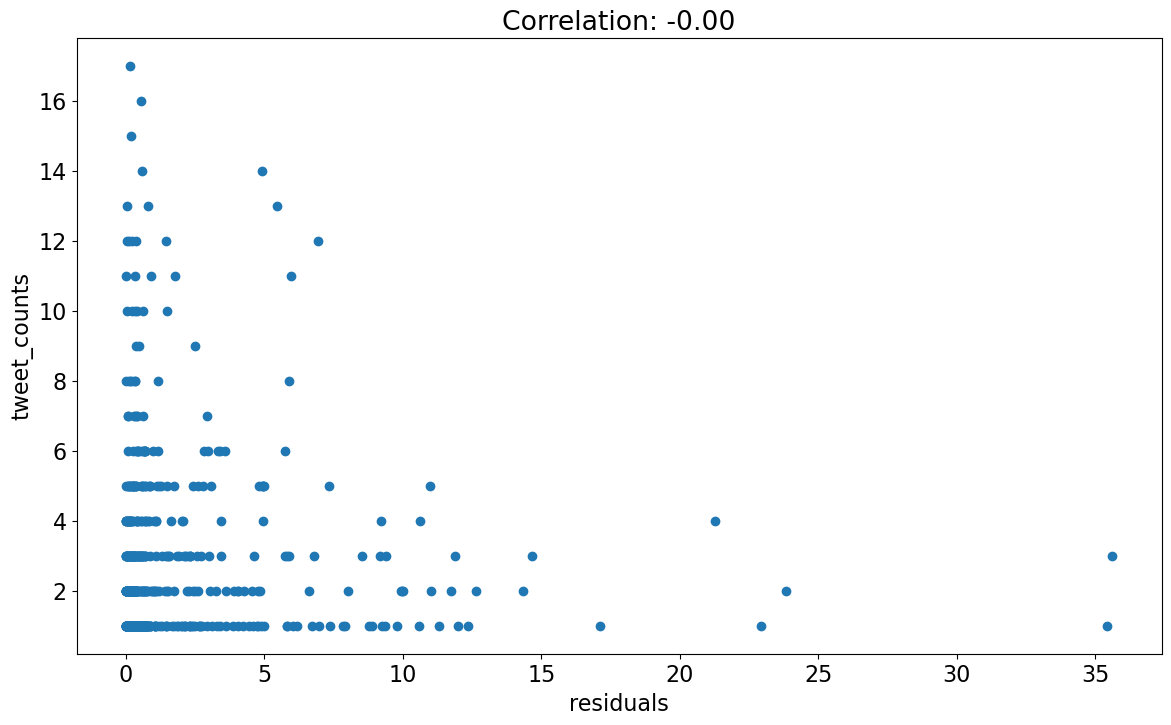

In [67]:
# calculate the correlation between columns residuals and tweet_counts
correlation = positive_resid['residuals'].corr(positive_resid['tweet_counts'])

# create a scatter plot
plt.scatter(positive_resid['residuals'], positive_resid['tweet_counts'])

# set the title and axis labels
plt.title(f'Correlation: {correlation:.2f}')
plt.xlabel('residuals')
plt.ylabel('tweet_counts')

# display the plot
plt.show()